In [11]:
# Szükséges könyvtárak importálása
import pandas as pd  # Adattáblák és adatmanipuláció
import numpy as np  # Matematikai műveletek
import seaborn as sns  # Adatvizualizáció
import os  # Operációs rendszer műveletei
import datetime  # Dátum-idő műveletek
import matplotlib.pyplot as plt  # Ábrák és grafikonok
# Jupyter Notebookban történő ábrák megjelenítése
%matplotlib inline

In [18]:
# Az adatok beolvasása a "Energy_consumption_hourly.csv" CSV fájlból a pandas DataFrame-be
df = pd.read_csv("Energy_consumption_hourly.csv")

In [24]:
# A DataFrame részletes információinak lekérése
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [34]:
# Az első és utolsó 5 sor lekérdezése, hogy lássuk milyen formában vannak az adatok.
df.head(5)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [36]:
df.tail(5)

,Datetime,AEP_MW
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0
121272,2018-01-02 00:00:00,19993.0


In [39]:
# Összefoglaló statisztikai információk lekérése a numerikus oszlopokról a DataFrame-ben
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [42]:
# Másolat készítése az eredeti DataFrame-ről
dataset = df.copy()

# Az "Datetime" oszlop felhasználása új oszlopok létrehozására dátum-idő részek alapján
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()

# Az új oszlopokat tartalmazó DataFrame beállítása indexként a "Datetime" oszlopra
dataset = dataset.set_index("Datetime")

# A DataFrame indexének átalakítása datetime típusúvá
dataset.index = pd.to_datetime(dataset.index)

In [45]:
# Meggyőződés arról, hogy jól sikerült-e elszeparálni a dátum-idő oszlopok létrehozását.
dataset.head(5)

,AEP_MW,Year,Month,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,2004,12,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,12865.0,2004,12,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,12577.0,2004,12,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,12517.0,2004,12,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,12670.0,2004,12,2004-12-31,05:00:00,53,Friday


In [48]:
# Maximum érték megkeresése
dataset[dataset["AEP_MW"] == df["AEP_MW"].max()]

,AEP_MW,Year,Month,Date,Time,Week,Day
Datetime,,,,,,,
2008-10-20 14:00:00,25695.0,2008,10,2008-10-20,14:00:00,43,Monday


In [51]:
# Minimum érték megkeresése
dataset[dataset["AEP_MW"] == df["AEP_MW"].min()]

,AEP_MW,Year,Month,Date,Time,Week,Day
Datetime,,,,,,,
2016-10-02 05:00:00,9581.0,2016,10,2016-10-02,05:00:00,39,Sunday


<Axes: xlabel='AEP_MW', ylabel='Density'>

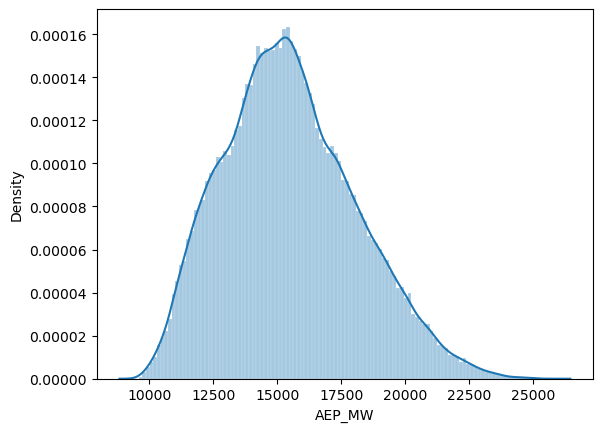

In [54]:
# Sűrűség-histogram létrehozása az energiafogyasztási adatok ("AEP_MW") oszlop alapján
sns.histplot(
    df["AEP_MW"],         # Adatok az "AEP_MW" oszlopból
    kde=True,             # KDE görbe hozzáadása a hisztogramhoz
    stat="density",       # Sűrűségmegjelenítés beállítása a hisztogramon
    kde_kws=dict(cut=3),  # KDE görbe vágása adatainak szűrése érdekében
    alpha=.4,             # Átlátszóság beállítása az ábrához
    edgecolor=(1, 1, 1, .4),  # Élek színének beállítása a hisztogramon
)

In [60]:
# Egyedi évek meghatározása
dataset["Year"].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018], dtype=int32)

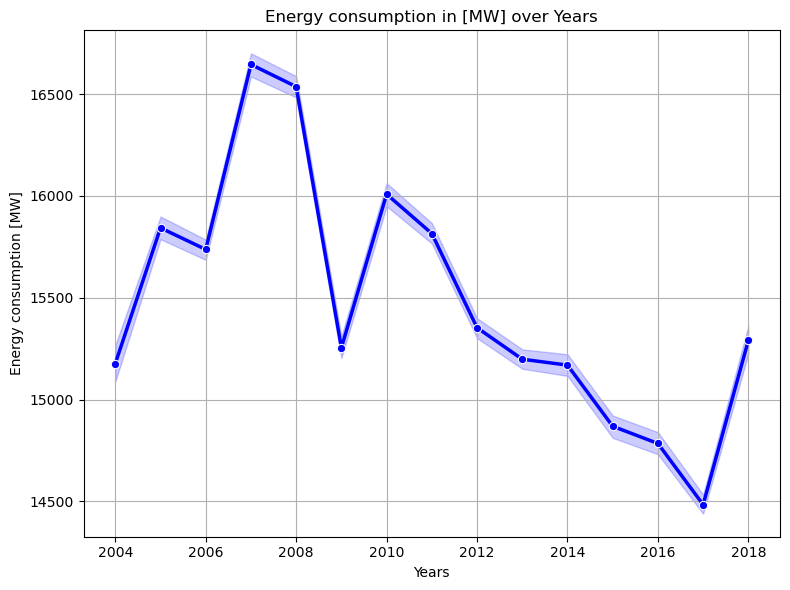

In [65]:
# Ábra inicializálása a matplotlib segítségével
plt.figure(figsize=(8, 6))  # Ábra méretének beállítása (8x6 inches)

# Vonaldiagram létrehozása az éves energiafogyasztás alapján
sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=dataset, marker='o', color='blue', linewidth=2.5)

# X és Y tengely címkéinek beállítása
plt.xlabel('Years')  # X tengely felirata: "Évek"
plt.ylabel('Energy consumption [MW]')  # Y tengely felirata: "Energiáfogyasztás [MW]"

# Ábra címe beállítása
plt.title('Energy consumption in [MW] over Years')  # Ábra címe: "Energiáfogyasztás [MW] az évek során"

# Rács hozzáadása az ábra háttérbe
plt.grid(True)

# A legnagyobb és legkisebb értékek lekérése az "AEP_MW" oszlopból
max_value = df['AEP_MW'].max()  # Legnagyobb érték az "AEP_MW" oszlopban
min_value = df['AEP_MW'].min()  # Legkisebb érték az "AEP_MW" oszlopban

# Ábra elemek rendezése, hogy jobban látható legyen
plt.tight_layout()  # Ábra elemek rendezése a jobb láthatóság érdekében

Text(0.5, 1.0, 'Regression of energy consumption in [MW] over Years')

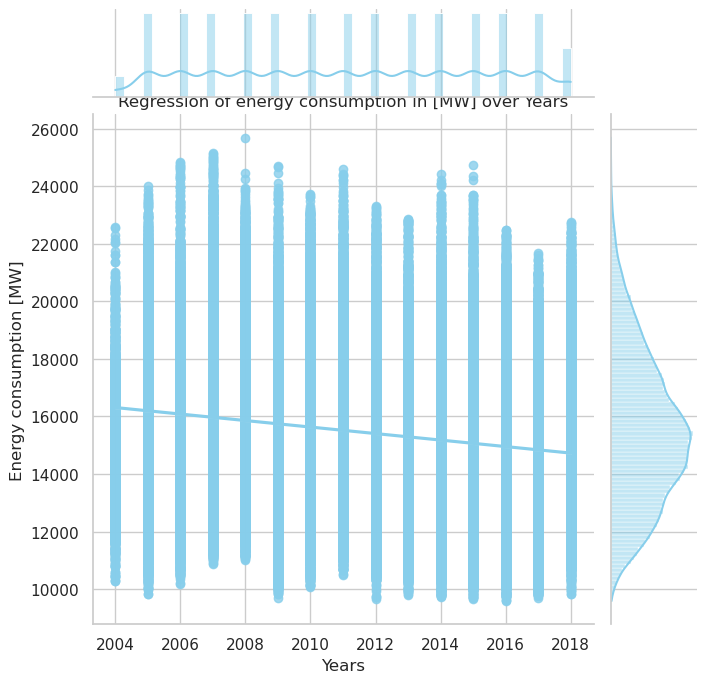

In [68]:
# A seaborn stílusának beállítása "whitegrid" stílusra
sns.set(style="whitegrid")

# Közös eloszlás és regressziós plot létrehozása az "Year" és "AEP_MW" változók között
sns.jointplot(x='Year', y='AEP_MW', data=dataset, kind="reg", height=7, color='skyblue')

# X és Y tengely címkéinek beállítása
plt.xlabel('Years')  # X tengely címkéje: "Évek"
plt.ylabel('Energy consumption [MW]')  # Y tengely címkéje: "Energiáfogyasztás [MW]"

# Ábra címe beállítása
plt.title('Regression of energy consumption in [MW] over Years')  # Ábra címe: "Energiáfogyasztás regressziója [MW] az évek során"

Text(0.5, 1.0, 'Regression of energy consumption in [MW] over Years')

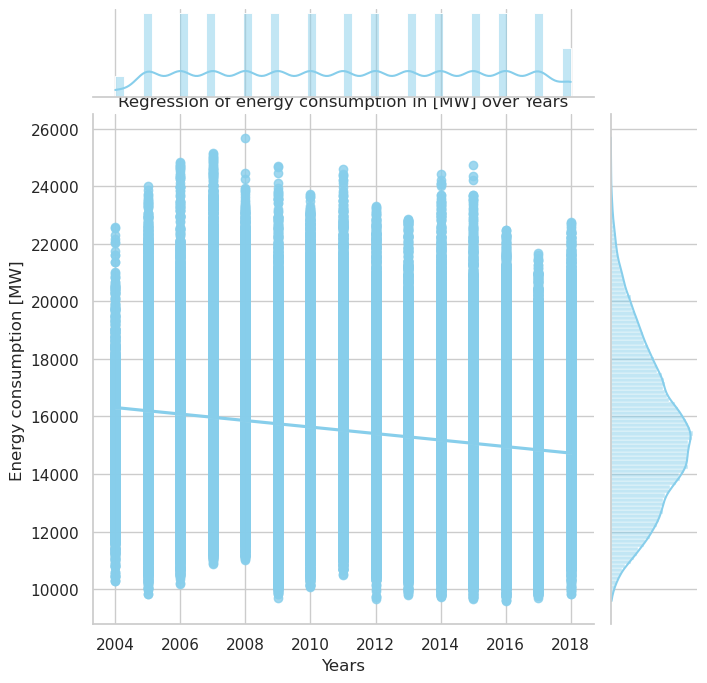

In [71]:
# A seaborn stílusának beállítása "whitegrid" stílusra
sns.set(style="whitegrid")

# Joint plot létrehozása az "Year" és "AEP_MW" változók között, adatainak regressziós illesztéssel
sns.jointplot(x='Year', y='AEP_MW', data=dataset, kind="reg", height=7, color='skyblue')

# X tengely címének beállítása
plt.xlabel('Years')  # X tengely címkéje: "Évek"

# Y tengely címének beállítása
plt.ylabel('Energy consumption [MW]')  # Y tengely címkéje: "Energiáfogyasztás [MW]"

# Ábra címe: "Energiáfogyasztás regressziója [MW] az évek során"
plt.title('Regression of energy consumption in [MW] over Years')

Text(0.5, 1.0, 'Regression of energy consumption in [MW] over Years')

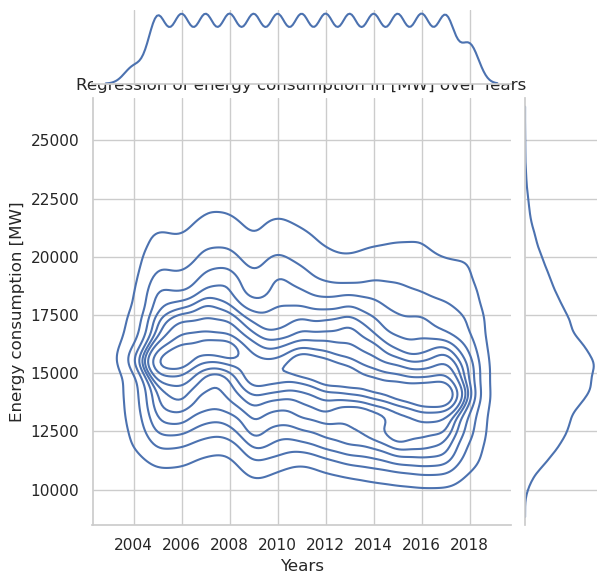

In [102]:
# Hasonló az előző seaborn eljáráshoz, amelyen regressziós illesztést végeztünk, csak ez a scrpit "kde" görbével ábrázol
sns.set(style="whitegrid")
sns.jointplot(x='Year', y='AEP_MW', data=dataset, kind="kde")
plt.xlabel('Years')
plt.ylabel('Energy consumption [MW]')
plt.title('Regression of energy consumption in [MW] over Years')

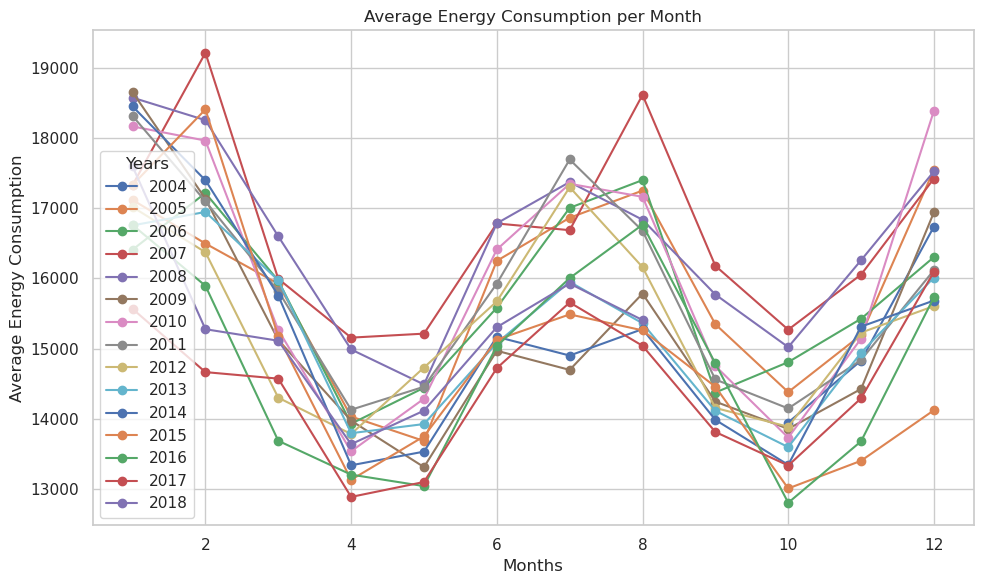

In [86]:
# Ábra méretének beállítása
plt.figure(figsize=(10, 6))  # Ábra mérete: 10 x 6 inches

# Vonaldiagramok létrehozása minden évhez az átlagos havi energiafogyasztás alapján
for year, data in avg_monthly_consumption.iterrows():
    plt.plot(data.index, data.values, marker='o', linestyle='-', label=str(year))
    # Iteráció az évekön és adatokon; minden évhez egy vonal létrehozása az átlagos havi energiafogyasztás alapján,
    # 'o' marker-rel (pontok) és folytonos vonallal

plt.xlabel('Months')  # X tengely címkéje: "Months" (Hónapok)
plt.ylabel('Average Energy Consumption')  # Y tengely címkéje: "Average Energy Consumption" (Átlagos energiafogyasztás)

# Ábra címének beállítása
plt.title('Average Energy Consumption per Month')

# Jelmagyarázat (legend) hozzáadása az évekhez
plt.legend(title='Years')

# Rács hozzáadása az ábra háttérbe
plt.grid(True)

# Ábra igazítása és megjelenítése
plt.tight_layout()
plt.show()

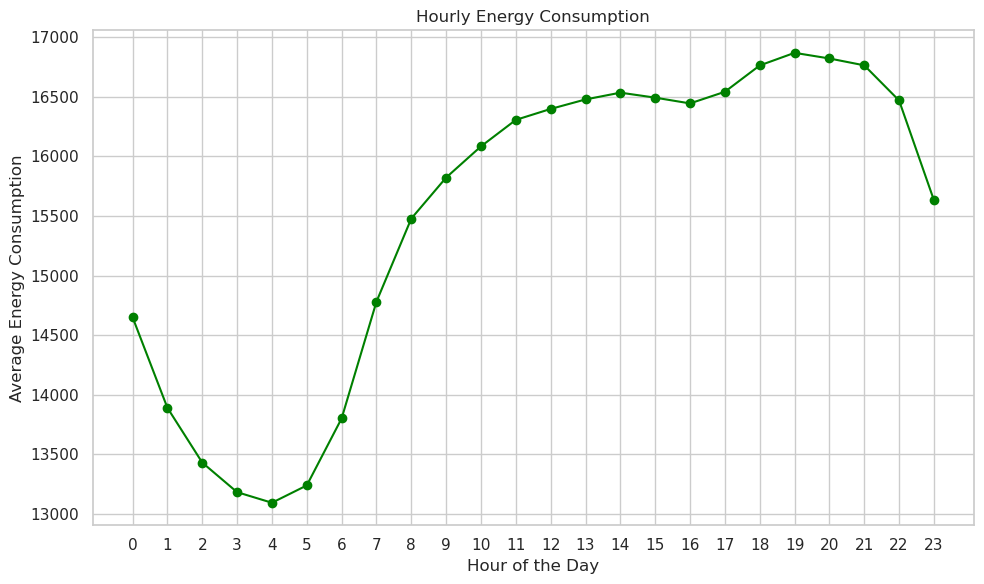

In [98]:
# Adatok beolvasása a "Energy_consumption_hourly.csv" fájlból a DataFrame-be
df = pd.read_csv("Energy_consumption_hourly.csv")

# 'Datetime' oszlop átalakítása dátum-idő típusúvá a 'Datetime_mean' oszlop létrehozásával
df['Datetime_mean'] = pd.to_datetime(df['Datetime'])

# Óránkénti energiafogyasztás kiszámítása az 'Hour' oszlop létrehozásával és az átlagolással
df['Hour'] = df['Datetime_mean'].dt.hour
hourly_consumption = df.groupby('Hour')['AEP_MW'].mean()

# Ábra létrehozása a vonaldiagrammal
plt.figure(figsize=(10, 6))

# Vonaldiagramm készítése az óránkénti átlagos energiafogyasztásból
hourly_consumption.plot(kind='line', marker='o', color='green')
# Grafikon konfigurációk
plt.title('Hourly Energy Consumption')  # Ábra címe: "Óránkénti energiafogyasztás"
plt.xlabel('Hour of the Day')  # X tengely címkéje: "Nap órája"
plt.ylabel('Average Energy Consumption')  # Y tengely címkéje: "Átlagos energiafogyasztás"
plt.xticks(hourly_consumption.index)  # X tengely címkéinek beállítása az órák szerint
plt.tight_layout()

# Ábra megjelenítése
plt.show()

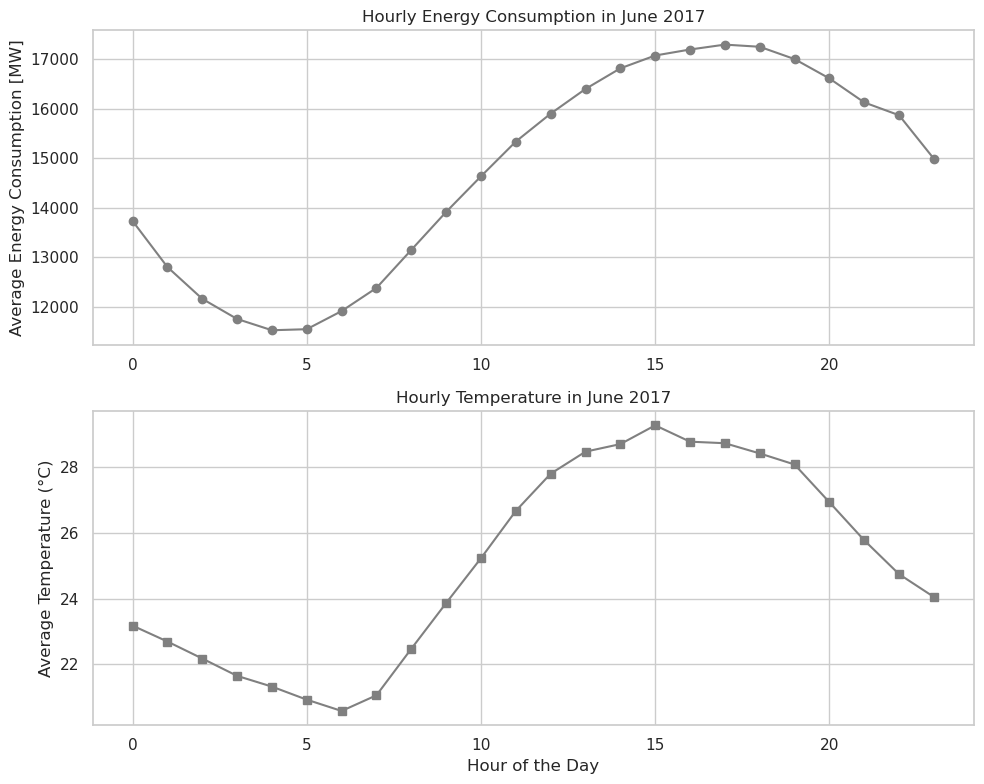

In [100]:
df_energy = pd.read_csv("Energy_consumption_hourly.csv") 
df_temp = pd.read_csv("2017_june_temp.csv")

# 'Datetime' oszlopok átalakítása datetime típusúvá
df_energy['Datetime'] = pd.to_datetime(df_energy['Datetime'])
df_temp['datetime'] = pd.to_datetime(df_temp['datetime'])

# Óránkénti energiafogyasztás számolása és 2017 júniusra szűrése
hourly_energy_consumption = df_energy[(df_energy['Datetime'].dt.year == 2017) &
                                      (df_energy['Datetime'].dt.month == 6)].groupby(df_energy['Datetime'].dt.hour)['AEP_MW'].mean()

# Óránkénti hőmérséklet kiválasztása és 2017 júniusra szűrése
hourly_temp = df_temp[(df_temp['datetime'].dt.year == 2017) &
                      (df_temp['datetime'].dt.month == 6)].groupby(df_temp['datetime'].dt.hour)['temp'].mean()

# Teljes órarend létrehozása (0-23 óráig)
full_hours = pd.Series(range(24))

# Az energiafogyasztás és hőmérséklet adatok feltöltése hiányzó órákra
hourly_energy_consumption = hourly_energy_consumption.reindex(full_hours, fill_value=0)
hourly_temp = hourly_temp.reindex(full_hours, fill_value=0)

# Két egymás alatti subplot létrehozása
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Az energiafogyasztás ábrázolása az első subploton
ax1.plot(full_hours, hourly_energy_consumption.values, marker='o', linestyle='-', color='grey')
ax1.set_ylabel('Average Energy Consumption [MW]')
ax1.set_title('Hourly Energy Consumption in June 2017')
ax1.grid(True)

# Az óránkénti hőmérséklet ábrázolása a második subploton
ax2.plot(full_hours, hourly_temp.values, marker='s', linestyle='-', color='grey')
ax2.set_xlabel('Hour of the Day')
ax2.set_ylabel('Average Temperature (°C)')
ax2.set_title('Hourly Temperature in June 2017')
ax2.grid(True)

# Ábrák megjelenítése
plt.tight_layout()
plt.show()